In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Retail_dataset = pd.read_csv("/content/train.csv")
#loading the data

In [3]:
Retail_dataset.shape
#provides the number of rows and columns

(9800, 18)

In [4]:
Retail_dataset.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [5]:
Retail_dataset.info()
#provides a concise summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [6]:
Retail_dataset.describe()
#statistical insights

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [7]:
##finds number of null values in every column
Retail_dataset.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [8]:
#droping the rows which has null/missing values
Retail_dataset.dropna(subset=['Postal Code'], inplace=True)

In [9]:
(Retail_dataset.isnull().sum())

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [10]:
duplicates = Retail_dataset[Retail_dataset.duplicated()]
print(duplicates)
#finding the duplicate values in the datset

Empty DataFrame
Columns: [Row ID, Order ID, Order Date, Ship Date, Ship Mode, Customer ID, Customer Name, Segment, Country, City, State, Postal Code, Region, Product ID, Category, Sub-Category, Product Name, Sales]
Index: []


There are no duplicate rows in the dataset.

In [11]:
# Drop unnecessary columns
Retail_dataset.drop(columns=['Row ID', 'Order ID', 'Customer ID', 'Customer Name', 'Product ID'], inplace=True)

In [12]:
# Convert date columns to datetime format
Retail_dataset['Order Date'] = pd.to_datetime(Retail_dataset['Order Date'], format='%d/%m/%Y')
Retail_dataset['Ship Date'] = pd.to_datetime(Retail_dataset['Ship Date'], format='%d/%m/%Y')

In [13]:
# Check the cleaned DataFrame
print(Retail_dataset.head())

  Order Date  Ship Date       Ship Mode    Segment        Country  \
0 2017-11-08 2017-11-11    Second Class   Consumer  United States   
1 2017-11-08 2017-11-11    Second Class   Consumer  United States   
2 2017-06-12 2017-06-16    Second Class  Corporate  United States   
3 2016-10-11 2016-10-18  Standard Class   Consumer  United States   
4 2016-10-11 2016-10-18  Standard Class   Consumer  United States   

              City       State  Postal Code Region         Category  \
0        Henderson    Kentucky      42420.0  South        Furniture   
1        Henderson    Kentucky      42420.0  South        Furniture   
2      Los Angeles  California      90036.0   West  Office Supplies   
3  Fort Lauderdale     Florida      33311.0  South        Furniture   
4  Fort Lauderdale     Florida      33311.0  South  Office Supplies   

  Sub-Category                                       Product Name     Sales  
0    Bookcases                  Bush Somerset Collection Bookcase  261.9600  
1 

In [14]:
Retail_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9789 entries, 0 to 9799
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    9789 non-null   datetime64[ns]
 1   Ship Date     9789 non-null   datetime64[ns]
 2   Ship Mode     9789 non-null   object        
 3   Segment       9789 non-null   object        
 4   Country       9789 non-null   object        
 5   City          9789 non-null   object        
 6   State         9789 non-null   object        
 7   Postal Code   9789 non-null   float64       
 8   Region        9789 non-null   object        
 9   Category      9789 non-null   object        
 10  Sub-Category  9789 non-null   object        
 11  Product Name  9789 non-null   object        
 12  Sales         9789 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(9)
memory usage: 1.0+ MB


In [15]:
# Summary statistics for numerical columns
print(Retail_dataset.describe())

                          Order Date                      Ship Date  \
count                           9789                           9789   
mean   2017-05-01 02:51:57.866993664  2017-05-05 01:56:03.898253056   
min              2015-01-03 00:00:00            2015-01-07 00:00:00   
25%              2016-05-23 00:00:00            2016-05-27 00:00:00   
50%              2017-06-26 00:00:00            2017-06-29 00:00:00   
75%              2018-05-15 00:00:00            2018-05-19 00:00:00   
max              2018-12-30 00:00:00            2019-01-05 00:00:00   
std                              NaN                            NaN   

        Postal Code         Sales  
count   9789.000000   9789.000000  
mean   55273.322403    230.116193  
min     1040.000000      0.444000  
25%    23223.000000     17.248000  
50%    58103.000000     54.384000  
75%    90008.000000    210.392000  
max    99301.000000  22638.480000  
std    32041.223413    625.302079  


In [16]:
# Summary statistics for categorical columns
print(Retail_dataset.describe(include=['object']))

             Ship Mode   Segment        Country           City       State  \
count             9789      9789           9789           9789        9789   
unique               4         3              1            529          48   
top     Standard Class  Consumer  United States  New York City  California   
freq              5849      5096           9789            891        1946   

       Region         Category Sub-Category     Product Name  
count    9789             9789         9789             9789  
unique      4                3           17             1848  
top      West  Office Supplies      Binders  Staple envelope  
freq     3140             5903         1492               47  


Ship Mode
First Class       3.455723e+05
Same Day          1.252190e+05
Second Class      4.491990e+05
Standard Class    1.332617e+06
Name: Sales, dtype: float64


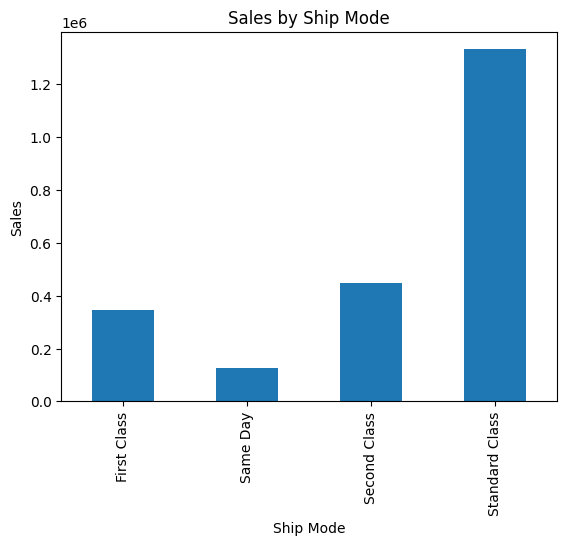

In [ ]:
#Sales by Ship Mode

# Group by Ship Mode and sum sales
ship_mode_sales = Retail_dataset.groupby('Ship Mode')['Sales'].sum()
print(ship_mode_sales)

# Plot sales by Ship Mode
ship_mode_sales.plot(kind='bar', title='Sales by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Sales')
plt.show()


Region
Central    492646.9132
East       660589.3560
South      389151.4590
West       710219.6845
Name: Sales, dtype: float64


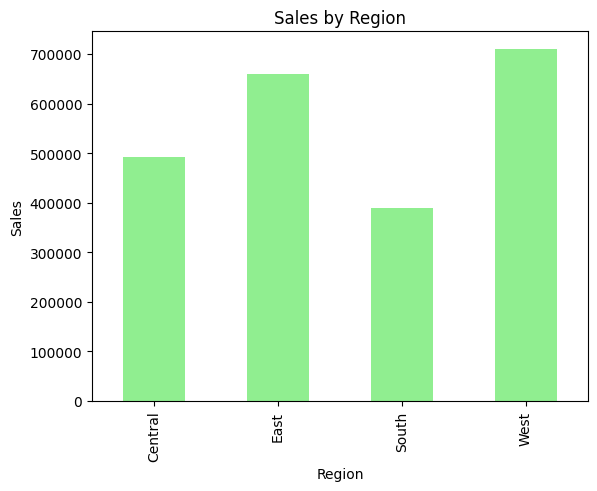

In [ ]:
#sales by Region
# Group by Region and sum sales
region_sales = Retail_dataset.groupby('Region')['Sales'].sum()
print(region_sales)

# Plot sales by Region
region_sales.plot(kind='bar', color='lightgreen' ,title='Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()


Category
Furniture          723538.4757
Office Supplies    703212.8240
Technology         825856.1130
Name: Sales, dtype: float64


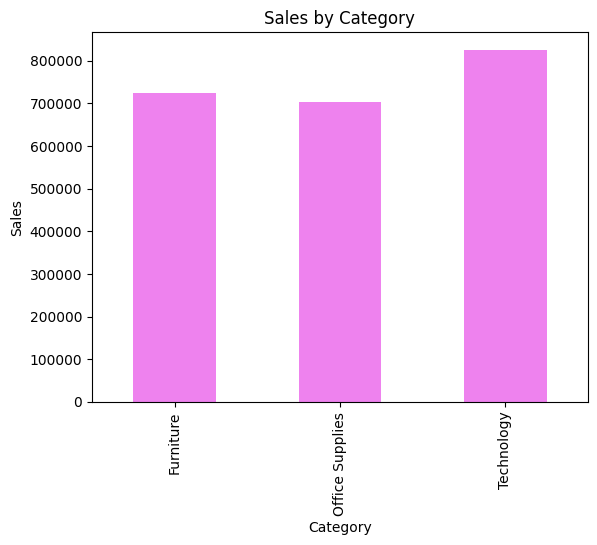

In [18]:
#sales by Category
# Group by Product Category and sum sales
category_sales = Retail_dataset.groupby('Category')['Sales'].sum()
print(category_sales)

# Plot sales by Category
category_sales.plot(kind='bar',color = 'violet' ,title='Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()


Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
GBC Ibimaster 500 Manual ProClick Binding System                               19024.500
Hewlett Packard LaserJet 3310 Copier                                           18839.686
HP Designjet T520 Inkjet Large Format Printer - 24" Color                      18374.895
GBC DocuBind P400 Electric Binding System                                      17965.068
High Speed Automatic Electric Letter Opener                                    17030.312
Name: Sales, dtype: float64


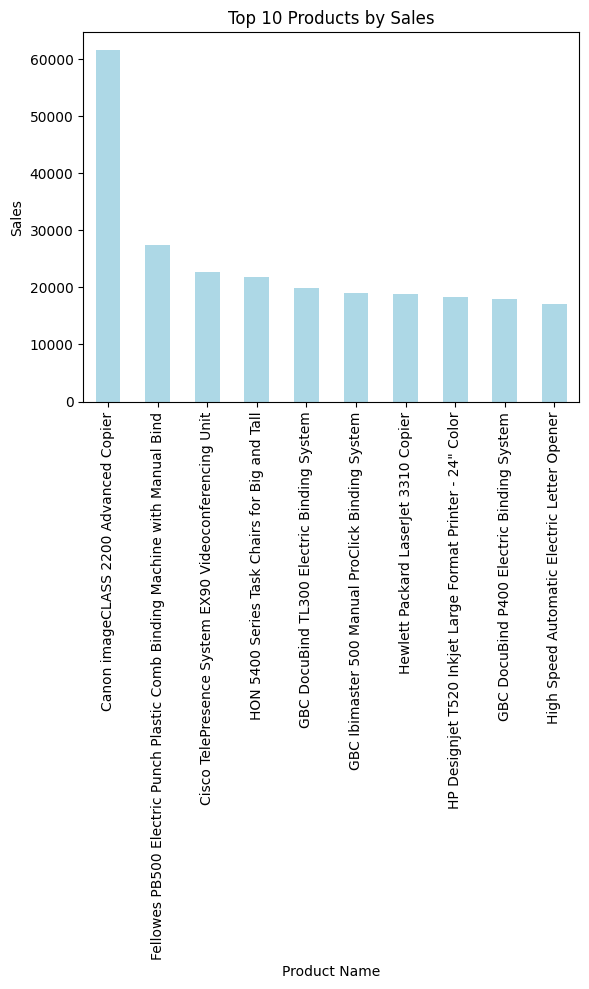

In [19]:
# Top 10 products with highest sales
# Group by Product Name and sum sales
product_sales = Retail_dataset.groupby('Product Name')['Sales'].sum().sort_values(ascending=False)
print(product_sales.head(10))  # Top 10 products by sales

# Plot top 10 products
product_sales.head(10).plot(kind='bar',color ='lightblue', title='Top 10 Products by Sales')
plt.xlabel('Product Name')
plt.ylabel('Sales')
plt.show()


Segment
Consumer       1.146708e+06
Corporate      6.822118e+05
Home Office    4.236874e+05
Name: Sales, dtype: float64


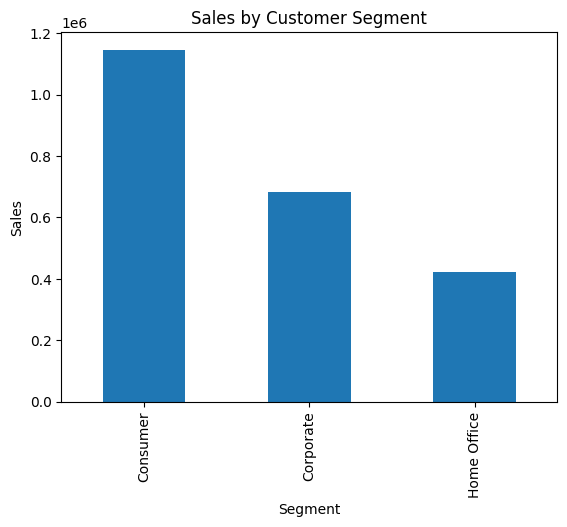

In [20]:
# sales by Segment
# Group by Segment and sum sales
segment_sales = Retail_dataset.groupby('Segment')['Sales'].sum()
print(segment_sales)

# Plot sales by Segment
segment_sales.plot(kind='bar', title='Sales by Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Sales')
plt.show()


Year
2015    479856.2081
2016    454315.9054
2017    597225.4900
2018    721209.8092
Name: Sales, dtype: float64


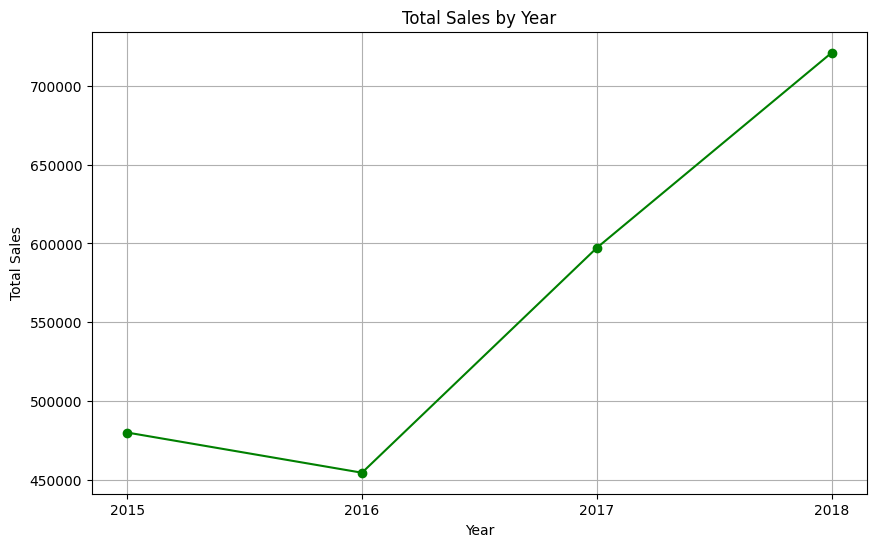

In [21]:
#total Sales in different years

# Ensure 'Order Date' is in datetime format
Retail_dataset['Order Date'] = pd.to_datetime(Retail_dataset['Order Date'])

# Extract the year from the 'Order Date' column
Retail_dataset['Year'] = Retail_dataset['Order Date'].dt.year.astype(int)

# Group by Year and sum sales
yearly_sales = Retail_dataset.groupby('Year')['Sales'].sum()

# Print the total sales for each year
print(yearly_sales)

# Plot total sales by year
plt.figure(figsize=(10, 6))
yearly_sales.plot(kind='line', marker = 'o', color='green', title='Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(yearly_sales.index)  # Ensure x-axis labels are correctly set
plt.grid(True)
plt.show()

State
California      446306.4635
New York        306361.1470
Texas           168572.5322
Washington      135206.8500
Pennsylvania    116276.6500
Florida          88436.5320
Illinois         79236.5170
Michigan         76136.0740
Ohio             75130.3500
Virginia         70636.7200
Name: Sales, dtype: float64


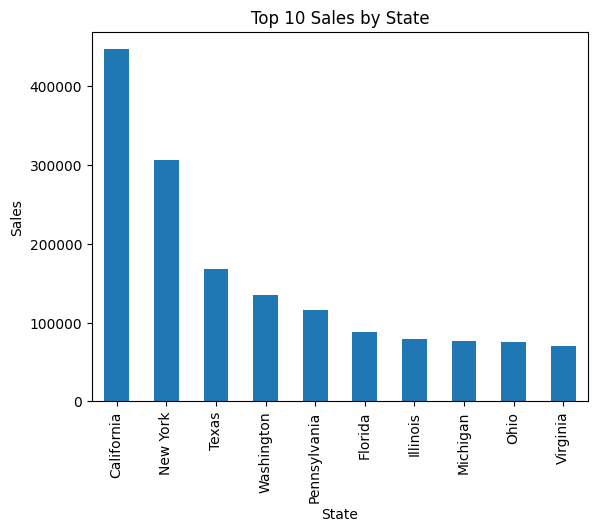

In [23]:
# top 10 Sales by State
# Group by State and sum sales
state_sales = Retail_dataset.groupby('State')['Sales'].sum().sort_values(ascending=False)
print(state_sales.head(10))

# Plot Top 10 states
state_sales.head(10).plot(kind='bar', title='Top 10 Sales by State')
plt.xlabel('State')
plt.ylabel('Sales')
plt.show()